In [35]:
# load libraries and scripts
include("../scripts/tools.jl")
include("../scripts/get_grid.jl")
include("../scripts/get_params.jl")
include("../scripts/stable.jl")
include("../scripts/dynamics.jl")
include("../scripts/disturbances.jl")
include("../scripts/plotting.jl")
include("../scripts/ps_analysis.jl");
using Statistics

In [36]:
#load borders
border, scale_factor = import_border("../data/borders/border.json")

dx = 0.005
mesh = get_grid(border, dx);

In [37]:
# compute or load grid parameters
contmod = get_params(mesh, scale_factor, "../data/disc/pantagruel.h5", Niter=60,
    dmax = 2*dx, patch=4000.0, bmin=0.0, tau=0.00001);
p0 = copy(contmod.p)
m0 = copy(contmod.m)
d0 = copy(contmod.d)
bx0 = copy(contmod.bx)
by0 = copy(contmod.by)

  3.002194 seconds (1.34 M allocations: 16.848 GiB, 3.20% gc time, 0.00% compilation time)
  6.140326 seconds (18.52 k allocations: 5.442 GiB, 9.21% gc time)


31365-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [4]:
compute_stable_sol_old!(contmod, interval = 10000, Niter = 250000, tol = 1e-7);

[10000.0 8.967022522066159e-5]
[20000.0 1.680045517837847e-5]
[30000.0 7.5607218059103865e-6]
[40000.0 4.468156176384852e-6]
[50000.0 2.6686238522311e-6]
[60000.0 1.6090509439292688e-6]
[70000.0 9.826666900192293e-7]
[80000.0 6.119008550964367e-7]
[90000.0 3.9236106474938026e-7]
[100000.0 2.6235620720349573e-7]
[110000.0 1.8537128121387525e-7]
[120000.0 1.397838145233976e-7]
[130000.0 1.127890422170097e-7]
[140000.0 9.680413204371519e-8]
 16.537898 seconds (1.59 M allocations: 45.768 GiB, 5.24% gc time, 1.71% compilation time)


In [ ]:
#add_local_disturbance!(contmod, [-0.35; 0.24], -10.0, 0.02, dx);

In [5]:
ts, th1, om1 = perform_dyn_sim(contmod, interval=2,
    Ndt=500, dt=0.01, method="cn");

Total time: 5.0
NIter: 2 Avg. Omega: -1.3030404134715426e-6
NIter: 4 Avg. Omega: -2.456394063808493e-6
NIter: 6 Avg. Omega: -3.3922491384287194e-6
NIter: 8 Avg. Omega: -4.111174940150305e-6
NIter: 10 Avg. Omega: -4.650940180428537e-6
NIter: 12 Avg. Omega: -5.059822337362367e-6
NIter: 14 Avg. Omega: -5.386517480757128e-6
NIter: 16 Avg. Omega: -5.675759160363863e-6
NIter: 18 Avg. Omega: -5.968135004218197e-6
NIter: 20 Avg. Omega: -6.298197083798725e-6
NIter: 22 Avg. Omega: -6.6929320199749986e-6
NIter: 24 Avg. Omega: -7.1718123962746955e-6
NIter: 26 Avg. Omega: -7.746768654461702e-6
NIter: 28 Avg. Omega: -8.422252596125333e-6
NIter: 30 Avg. Omega: -9.193714336756018e-6
NIter: 32 Avg. Omega: -1.0049805157773715e-5
NIter: 34 Avg. Omega: -1.0973395806975823e-5
NIter: 36 Avg. Omega: -1.1944284277772098e-5
NIter: 38 Avg. Omega: -1.2939211183275044e-5
NIter: 40 Avg. Omega: -1.3930165187526554e-5
NIter: 42 Avg. Omega: -1.4884271892347616e-5
NIter: 44 Avg. Omega: -1.57649586666565e-5
NIter: 46 A

NIter: 368 Avg. Omega: 1.1723789408874546e-5
NIter: 370 Avg. Omega: 1.107377336817185e-5
NIter: 372 Avg. Omega: 1.0380034196061683e-5
NIter: 374 Avg. Omega: 9.647844012291459e-6
NIter: 376 Avg. Omega: 8.885575628013622e-6
NIter: 378 Avg. Omega: 8.104957255148658e-6
NIter: 380 Avg. Omega: 7.321292585816858e-6
NIter: 382 Avg. Omega: 6.5520067333943505e-6
NIter: 384 Avg. Omega: 5.814204399233777e-6
NIter: 386 Avg. Omega: 5.118969976531803e-6
NIter: 388 Avg. Omega: 4.467551200387951e-6
NIter: 390 Avg. Omega: 3.8519499122148034e-6
NIter: 392 Avg. Omega: 3.2557680380399805e-6
NIter: 394 Avg. Omega: 2.6592782909225094e-6
NIter: 396 Avg. Omega: 2.0421592464077785e-6
NIter: 398 Avg. Omega: 1.3867118221092555e-6
NIter: 400 Avg. Omega: 6.806739034196984e-7
NIter: 402 Avg. Omega: -8.045137063833527e-8
NIter: 404 Avg. Omega: -8.931069316700858e-7
NIter: 406 Avg. Omega: -1.7465539969120708e-6
NIter: 408 Avg. Omega: -2.6245667099472214e-6
NIter: 410 Avg. Omega: -3.510115101623714e-6
NIter: 412 Avg. O

In [45]:
isgrid = contmod.isgrid
println(sum(contmod.m)*dx^2)
println(sum(contmod.d)*dx^2)
println(sum(contmod.bx))
println(sum(contmod.bx))

contmod.m[isgrid] .= 10*sum(contmod.m[isgrid]) / sum(isgrid)
contmod.d[isgrid] .= sum(contmod.d[isgrid]) / sum(isgrid)
contmod.bx[isgrid] .= sum(contmod.bx[isgrid]) / sum(isgrid)
contmod.by[isgrid] .= sum(contmod.by[isgrid]) / sum(isgrid)
contmod.p = p0;
update_params!(contmod); # update xi, minv and gamma

println(sum(contmod.m)*dx^2)
println(sum(contmod.d)*dx^2)
println(sum(contmod.bx))
println(sum(contmod.bx))

181.46574100000012
59.42200189999998
769279.365644498
769279.365644498
1814.6574100000032
59.42200189999999
769279.3656444973
769279.3656444973


In [ ]:
#hm_plot(contmod, scale_factor*sqrt.(contmod2.bx./contmod2.m), borders =[border])

In [46]:
compute_stable_sol_old!(contmod, interval = 10000, Niter = 170000, tol = 1e-7);

[10000.0 7.109793030746214e-5]
[20000.0 2.3288157107836938e-5]
[30000.0 8.152110807624346e-6]
[40000.0 5.284015606954462e-6]
[50000.0 3.4632687667679463e-6]
[60000.0 2.278041239867079e-6]
[70000.0 1.503921180923129e-6]
[80000.0 9.996264199729765e-7]
[90000.0 6.721916574470299e-7]
[100000.0 4.601530585457425e-7]
[110000.0 3.2309562614241116e-7]
[120000.0 2.3461179632366935e-7]
[130000.0 1.7753086944960472e-7]
[140000.0 1.4072561749234325e-7]
[150000.0 1.1700095259303822e-7]
[160000.0 1.0171080311316416e-7]
[170000.0 9.18576462671794e-8]
 18.197524 seconds (1.02 M allocations: 55.524 GiB, 1.49% gc time)


In [47]:
add_local_disturbance!(contmod, [-0.35; 0.24], -10.0, 0.02, dx);

In [48]:
sum(contmod.p)

-399999.9999999958

In [49]:
ts, th2, om2 = perform_dyn_sim(contmod, interval=2,
    Ndt=5000, dt=0.01, method="cn");

Total time: 50.0
NIter: 2 Avg. Omega: -0.00011017755958101686
NIter: 4 Avg. Omega: -0.000220282986169677
NIter: 6 Avg. Omega: -0.0003303163270232352
NIter: 8 Avg. Omega: -0.0004402776294331107
NIter: 10 Avg. Omega: -0.0005501669403888829
NIter: 12 Avg. Omega: -0.0006599843072375674
NIter: 14 Avg. Omega: -0.000769729776957694
NIter: 16 Avg. Omega: -0.0008794033965712856
NIter: 18 Avg. Omega: -0.0009890052131583417
NIter: 20 Avg. Omega: -0.0010985352738056215
NIter: 22 Avg. Omega: -0.0012079936254071168
NIter: 24 Avg. Omega: -0.001317380314915431
NIter: 26 Avg. Omega: -0.0014266953893170924
NIter: 28 Avg. Omega: -0.0015359388954195572
NIter: 30 Avg. Omega: -0.0016451108801309041
NIter: 32 Avg. Omega: -0.0017542113902859994
NIter: 34 Avg. Omega: -0.0018632404726081687
NIter: 36 Avg. Omega: -0.0019721981739341116
NIter: 38 Avg. Omega: -0.0020810845409845236
NIter: 40 Avg. Omega: -0.0021898996204145443
NIter: 42 Avg. Omega: -0.0022986434589571283
NIter: 44 Avg. Omega: -0.0024073161032208763

NIter: 372 Avg. Omega: -0.01930035517800885
NIter: 374 Avg. Omega: -0.019397896850677915
NIter: 376 Avg. Omega: -0.019495374663079983
NIter: 378 Avg. Omega: -0.019592788657048808
NIter: 380 Avg. Omega: -0.01969013887435685
NIter: 382 Avg. Omega: -0.01978742535675761
NIter: 384 Avg. Omega: -0.019884648145991154
NIter: 386 Avg. Omega: -0.01998180728373756
NIter: 388 Avg. Omega: -0.020078902811677908
NIter: 390 Avg. Omega: -0.020175934771465877
NIter: 392 Avg. Omega: -0.020272903204697233
NIter: 394 Avg. Omega: -0.020369808152978276
NIter: 396 Avg. Omega: -0.0204666496578725
NIter: 398 Avg. Omega: -0.020563427760899044
NIter: 400 Avg. Omega: -0.020660142503589083
NIter: 402 Avg. Omega: -0.02075679392741193
NIter: 404 Avg. Omega: -0.020853382073821893
NIter: 406 Avg. Omega: -0.020949906984264556
NIter: 408 Avg. Omega: -0.021046368700118844
NIter: 410 Avg. Omega: -0.021142767262763876
NIter: 412 Avg. Omega: -0.02123910271355603
NIter: 414 Avg. Omega: -0.02133537509379455
NIter: 416 Avg. Ome

NIter: 742 Avg. Omega: -0.03630080721731753
NIter: 744 Avg. Omega: -0.036387218743080894
NIter: 746 Avg. Omega: -0.0364735736954733
NIter: 748 Avg. Omega: -0.036559872111526934
NIter: 750 Avg. Omega: -0.036646114028252075
NIter: 752 Avg. Omega: -0.03673229948264995
NIter: 754 Avg. Omega: -0.03681842851167587
NIter: 756 Avg. Omega: -0.036904501152275095
NIter: 758 Avg. Omega: -0.03699051744137085
NIter: 760 Avg. Omega: -0.03707647741584356
NIter: 762 Avg. Omega: -0.037162381112571224
NIter: 764 Avg. Omega: -0.037248228568400536
NIter: 766 Avg. Omega: -0.03733401982014166
NIter: 768 Avg. Omega: -0.037419754904602566
NIter: 770 Avg. Omega: -0.03750543385855116
NIter: 772 Avg. Omega: -0.03759105671873038
NIter: 774 Avg. Omega: -0.03767662352187667
NIter: 776 Avg. Omega: -0.03776213430468148
NIter: 778 Avg. Omega: -0.03784758910382288
NIter: 780 Avg. Omega: -0.03793298795596056
NIter: 782 Avg. Omega: -0.03801833089771258
NIter: 784 Avg. Omega: -0.03810361796568828
NIter: 786 Avg. Omega: -0.

NIter: 1116 Avg. Omega: -0.05151444846382852
NIter: 1118 Avg. Omega: -0.051590899662572784
NIter: 1120 Avg. Omega: -0.05166730080894061
NIter: 1122 Avg. Omega: -0.05174365193569683
NIter: 1124 Avg. Omega: -0.05181995307558873
NIter: 1126 Avg. Omega: -0.05189620426134811
NIter: 1128 Avg. Omega: -0.051972405525673844
NIter: 1130 Avg. Omega: -0.0520485569012526
NIter: 1132 Avg. Omega: -0.05212465842074773
NIter: 1134 Avg. Omega: -0.05220071011679322
NIter: 1136 Avg. Omega: -0.05227671202201442
NIter: 1138 Avg. Omega: -0.05235266416900828
NIter: 1140 Avg. Omega: -0.052428566590347274
NIter: 1142 Avg. Omega: -0.05250441931859386
NIter: 1144 Avg. Omega: -0.05258022238627737
NIter: 1146 Avg. Omega: -0.052655975825909515
NIter: 1148 Avg. Omega: -0.0527316796699866
NIter: 1150 Avg. Omega: -0.052807333950972805
NIter: 1152 Avg. Omega: -0.05288293870132029
NIter: 1154 Avg. Omega: -0.052958493953458495
NIter: 1156 Avg. Omega: -0.05303399973978811
NIter: 1158 Avg. Omega: -0.05310945609269924
NIter:

NIter: 1480 Avg. Omega: -0.064635611239855
NIter: 1482 Avg. Omega: -0.06470347205119133
NIter: 1484 Avg. Omega: -0.06477128843425164
NIter: 1486 Avg. Omega: -0.06483906041811834
NIter: 1488 Avg. Omega: -0.06490678803186388
NIter: 1490 Avg. Omega: -0.06497447130453718
NIter: 1492 Avg. Omega: -0.06504211026516532
NIter: 1494 Avg. Omega: -0.06510970494276315
NIter: 1496 Avg. Omega: -0.06517725536631974
NIter: 1498 Avg. Omega: -0.06524476156480716
NIter: 1500 Avg. Omega: -0.06531222356718291
NIter: 1502 Avg. Omega: -0.0653796414023788
NIter: 1504 Avg. Omega: -0.06544701509931362
NIter: 1506 Avg. Omega: -0.06551434468688593
NIter: 1508 Avg. Omega: -0.06558163019396981
NIter: 1510 Avg. Omega: -0.06564887164942738
NIter: 1512 Avg. Omega: -0.06571606908209861
NIter: 1514 Avg. Omega: -0.06578322252080233
NIter: 1516 Avg. Omega: -0.06585033199434537
NIter: 1518 Avg. Omega: -0.06591739753150912
NIter: 1520 Avg. Omega: -0.06598441916105798
NIter: 1522 Avg. Omega: -0.0660513969117414
NIter: 1524 Av

NIter: 1848 Avg. Omega: -0.07640285532328094
NIter: 1850 Avg. Omega: -0.0764630121538639
NIter: 1852 Avg. Omega: -0.07652312959994435
NIter: 1854 Avg. Omega: -0.07658320768730455
NIter: 1856 Avg. Omega: -0.07664324644171439
NIter: 1858 Avg. Omega: -0.07670324588892524
NIter: 1860 Avg. Omega: -0.07676320605466885
NIter: 1862 Avg. Omega: -0.07682312696466621
NIter: 1864 Avg. Omega: -0.07688300864461711
NIter: 1866 Avg. Omega: -0.07694285112020414
NIter: 1868 Avg. Omega: -0.07700265441709649
NIter: 1870 Avg. Omega: -0.07706241856094222
NIter: 1872 Avg. Omega: -0.07712214357737537
NIter: 1874 Avg. Omega: -0.0771818294920142
NIter: 1876 Avg. Omega: -0.07724147633045603
NIter: 1878 Avg. Omega: -0.07730108411828547
NIter: 1880 Avg. Omega: -0.0773606528810689
NIter: 1882 Avg. Omega: -0.07742018264435356
NIter: 1884 Avg. Omega: -0.07747967343367448
NIter: 1886 Avg. Omega: -0.07753912527454693
NIter: 1888 Avg. Omega: -0.07759853819246965
NIter: 1890 Avg. Omega: -0.07765791221292775
NIter: 1892 A

NIter: 2214 Avg. Omega: -0.08678084638775914
NIter: 2216 Avg. Omega: -0.08683420877753029
NIter: 2218 Avg. Omega: -0.08688753623109831
NIter: 2220 Avg. Omega: -0.086940828771337
NIter: 2222 Avg. Omega: -0.0869940864211024
NIter: 2224 Avg. Omega: -0.08704730920323825
NIter: 2226 Avg. Omega: -0.08710049714057298
NIter: 2228 Avg. Omega: -0.08715365025591773
NIter: 2230 Avg. Omega: -0.0872067685720718
NIter: 2232 Avg. Omega: -0.08725985211181796
NIter: 2234 Avg. Omega: -0.0873129008979231
NIter: 2236 Avg. Omega: -0.08736591495314179
NIter: 2238 Avg. Omega: -0.0874188943002114
NIter: 2240 Avg. Omega: -0.08747183896185518
NIter: 2242 Avg. Omega: -0.08752474896078268
NIter: 2244 Avg. Omega: -0.0875776243196858
NIter: 2246 Avg. Omega: -0.0876304650612438
NIter: 2248 Avg. Omega: -0.08768327120812154
NIter: 2250 Avg. Omega: -0.0877360427829664
NIter: 2252 Avg. Omega: -0.0877887798084134
NIter: 2254 Avg. Omega: -0.08784148230708208
NIter: 2256 Avg. Omega: -0.08789415030157569
NIter: 2258 Avg. Ome

NIter: 2584 Avg. Omega: -0.09608133020324312
NIter: 2586 Avg. Omega: -0.09612860359308877
NIter: 2588 Avg. Omega: -0.09617584603318335
NIter: 2590 Avg. Omega: -0.09622305754378867
NIter: 2592 Avg. Omega: -0.09627023814515366
NIter: 2594 Avg. Omega: -0.09631738785751548
NIter: 2596 Avg. Omega: -0.09636450670109614
NIter: 2598 Avg. Omega: -0.09641159469610587
NIter: 2600 Avg. Omega: -0.09645865186274179
NIter: 2602 Avg. Omega: -0.09650567822118601
NIter: 2604 Avg. Omega: -0.09655267379160946
NIter: 2606 Avg. Omega: -0.09659963859416842
NIter: 2608 Avg. Omega: -0.096646572649006
NIter: 2610 Avg. Omega: -0.096693475976254
NIter: 2612 Avg. Omega: -0.09674034859602879
NIter: 2614 Avg. Omega: -0.09678719052843421
NIter: 2616 Avg. Omega: -0.0968340017935622
NIter: 2618 Avg. Omega: -0.09688078241148927
NIter: 2620 Avg. Omega: -0.09692753240228057
NIter: 2622 Avg. Omega: -0.09697425178598831
NIter: 2624 Avg. Omega: -0.09702094058264996
NIter: 2626 Avg. Omega: -0.09706759881229159
NIter: 2628 Avg

NIter: 2954 Avg. Omega: -0.10432056759648423
NIter: 2956 Avg. Omega: -0.10436244678137634
NIter: 2958 Avg. Omega: -0.10440429854810482
NIter: 2960 Avg. Omega: -0.1044461229146008
NIter: 2962 Avg. Omega: -0.10448791989878872
NIter: 2964 Avg. Omega: -0.10452968951864622
NIter: 2966 Avg. Omega: -0.10457143179203572
NIter: 2968 Avg. Omega: -0.10461314673686288
NIter: 2970 Avg. Omega: -0.10465483437106862
NIter: 2972 Avg. Omega: -0.10469649471246759
NIter: 2974 Avg. Omega: -0.10473812777897851
NIter: 2976 Avg. Omega: -0.10477973358845345
NIter: 2978 Avg. Omega: -0.104821312158695
NIter: 2980 Avg. Omega: -0.10486286350758095
NIter: 2982 Avg. Omega: -0.10490438765291686
NIter: 2984 Avg. Omega: -0.1049458846125019
NIter: 2986 Avg. Omega: -0.10498735440417398
NIter: 2988 Avg. Omega: -0.10502879704567891
NIter: 2990 Avg. Omega: -0.10507021255479365
NIter: 2992 Avg. Omega: -0.10511160094931948
NIter: 2994 Avg. Omega: -0.1051529622469572
NIter: 2996 Avg. Omega: -0.1051942964654866
NIter: 2998 Avg.

NIter: 3320 Avg. Omega: -0.11154537985017104
NIter: 3322 Avg. Omega: -0.1115825289713436
NIter: 3324 Avg. Omega: -0.11161965377108354
NIter: 3326 Avg. Omega: -0.11165675426533736
NIter: 3328 Avg. Omega: -0.11169383047000117
NIter: 3330 Avg. Omega: -0.11173088240095898
NIter: 3332 Avg. Omega: -0.11176791007414891
NIter: 3334 Avg. Omega: -0.11180491350542726
NIter: 3336 Avg. Omega: -0.11184189271065606
NIter: 3338 Avg. Omega: -0.11187884770571609
NIter: 3340 Avg. Omega: -0.11191577850643557
NIter: 3342 Avg. Omega: -0.11195268512866811
NIter: 3344 Avg. Omega: -0.1119895675882518
NIter: 3346 Avg. Omega: -0.11202642590098469
NIter: 3348 Avg. Omega: -0.11206326008270259
NIter: 3350 Avg. Omega: -0.11210007014918505
NIter: 3352 Avg. Omega: -0.11213685611622762
NIter: 3354 Avg. Omega: -0.11217361799960078
NIter: 3356 Avg. Omega: -0.11221035581507488
NIter: 3358 Avg. Omega: -0.11224706957839564
NIter: 3360 Avg. Omega: -0.11228375930533352
NIter: 3362 Avg. Omega: -0.11232042501159945
NIter: 3364 

NIter: 3686 Avg. Omega: -0.11795418237294511
NIter: 3688 Avg. Omega: -0.11798713566959372
NIter: 3690 Avg. Omega: -0.11802006739181053
NIter: 3692 Avg. Omega: -0.11805297755372675
NIter: 3694 Avg. Omega: -0.11808586616945603
NIter: 3696 Avg. Omega: -0.11811873325309974
NIter: 3698 Avg. Omega: -0.1181515788187616
NIter: 3700 Avg. Omega: -0.11818440288052494
NIter: 3702 Avg. Omega: -0.11821720545246805
NIter: 3704 Avg. Omega: -0.11824998654866484
NIter: 3706 Avg. Omega: -0.11828274618316931
NIter: 3708 Avg. Omega: -0.11831548437003643
NIter: 3710 Avg. Omega: -0.11834820112331042
NIter: 3712 Avg. Omega: -0.11838089645701627
NIter: 3714 Avg. Omega: -0.1184135703851835
NIter: 3716 Avg. Omega: -0.11844622292182594
NIter: 3718 Avg. Omega: -0.11847885408094379
NIter: 3720 Avg. Omega: -0.11851146387653869
NIter: 3722 Avg. Omega: -0.11854405232259267
NIter: 3724 Avg. Omega: -0.11857661943308372
NIter: 3726 Avg. Omega: -0.11860916522198467
NIter: 3728 Avg. Omega: -0.11864168970324775
NIter: 3730 

NIter: 4054 Avg. Omega: -0.12366837112690703
NIter: 4056 Avg. Omega: -0.1236975833606599
NIter: 4058 Avg. Omega: -0.12372677646924446
NIter: 4060 Avg. Omega: -0.12375595046518671
NIter: 4062 Avg. Omega: -0.12378510536099963
NIter: 4064 Avg. Omega: -0.12381424116918224
NIter: 4066 Avg. Omega: -0.12384335790223702
NIter: 4068 Avg. Omega: -0.1238724555726504
NIter: 4070 Avg. Omega: -0.1239015341929005
NIter: 4072 Avg. Omega: -0.1239305937754644
NIter: 4074 Avg. Omega: -0.1239596343328012
NIter: 4076 Avg. Omega: -0.12398865587736792
NIter: 4078 Avg. Omega: -0.12401765842161591
NIter: 4080 Avg. Omega: -0.12404664197797875
NIter: 4082 Avg. Omega: -0.12407560655889185
NIter: 4084 Avg. Omega: -0.12410455217677974
NIter: 4086 Avg. Omega: -0.12413347884405257
NIter: 4088 Avg. Omega: -0.12416238657312187
NIter: 4090 Avg. Omega: -0.12419127537638397
NIter: 4092 Avg. Omega: -0.12422014526622815
NIter: 4094 Avg. Omega: -0.12424899625504132
NIter: 4096 Avg. Omega: -0.12427782835519283
NIter: 4098 Avg

NIter: 4426 Avg. Omega: -0.12878562448960781
NIter: 4428 Avg. Omega: -0.12881148647233823
NIter: 4430 Avg. Omega: -0.12883733152330498
NIter: 4432 Avg. Omega: -0.12886315965358897
NIter: 4434 Avg. Omega: -0.1288889708742722
NIter: 4436 Avg. Omega: -0.12891476519642428
NIter: 4438 Avg. Omega: -0.128940542631106
NIter: 4440 Avg. Omega: -0.1289663031893775
NIter: 4442 Avg. Omega: -0.12899204688228486
NIter: 4444 Avg. Omega: -0.12901777372086987
NIter: 4446 Avg. Omega: -0.12904348371617033
NIter: 4448 Avg. Omega: -0.1290691768792091
NIter: 4450 Avg. Omega: -0.1290948532210086
NIter: 4452 Avg. Omega: -0.12912051275258296
NIter: 4454 Avg. Omega: -0.12914615548493372
NIter: 4456 Avg. Omega: -0.12917178142906321
NIter: 4458 Avg. Omega: -0.12919739059596114
NIter: 4460 Avg. Omega: -0.12922298299660942
NIter: 4462 Avg. Omega: -0.129248558641989
NIter: 4464 Avg. Omega: -0.1292741175430659
NIter: 4466 Avg. Omega: -0.12929965971080287
NIter: 4468 Avg. Omega: -0.12932518515615885
NIter: 4470 Avg. Om

NIter: 4798 Avg. Omega: -0.13331599759400842
NIter: 4800 Avg. Omega: -0.13333889355453413
NIter: 4802 Avg. Omega: -0.1333617745251412
NIter: 4804 Avg. Omega: -0.13338464051564375
NIter: 4806 Avg. Omega: -0.13340749153584627
NIter: 4808 Avg. Omega: -0.1334303275955536
NIter: 4810 Avg. Omega: -0.13345314870455824
NIter: 4812 Avg. Omega: -0.1334759548726474
NIter: 4814 Avg. Omega: -0.13349874610960627
NIter: 4816 Avg. Omega: -0.13352152242520648
NIter: 4818 Avg. Omega: -0.13354428382921832
NIter: 4820 Avg. Omega: -0.13356703033140602
NIter: 4822 Avg. Omega: -0.13358976194152233
NIter: 4824 Avg. Omega: -0.1336124786693199
NIter: 4826 Avg. Omega: -0.13363518052454196
NIter: 4828 Avg. Omega: -0.13365786751692285
NIter: 4830 Avg. Omega: -0.13368053965619728
NIter: 4832 Avg. Omega: -0.13370319695208727
NIter: 4834 Avg. Omega: -0.13372583941430963
NIter: 4836 Avg. Omega: -0.1337484670525791
NIter: 4838 Avg. Omega: -0.13377107987659748
NIter: 4840 Avg. Omega: -0.13379367789606494
NIter: 4842 Avg

In [24]:
c = [500 -250; 0.0 0.0; -500 500; 500. 500.; -1500.0 -1000.0; 750.0 -1000; -1000 -400] / scale_factor
#c = [-1500.0 -1000;] / scale_factor
time_plot(contmod, ts, om1, c, borders = [border], tstart = 0.0, tend = 10.0)

LoadError: BoundsError: attempt to access 14597×251 Matrix{Float64} at index [11184, 1:500]

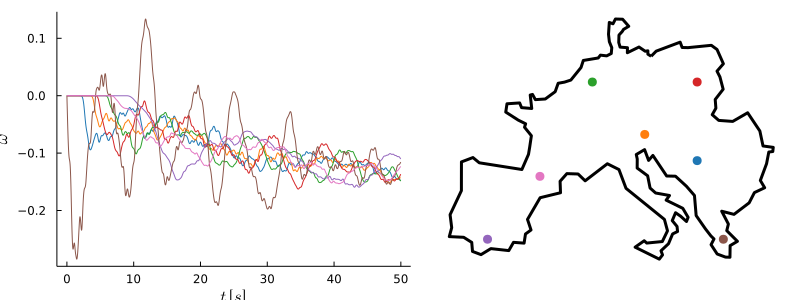

In [50]:
time_plot(contmod, ts, om2, c, borders = [border], tstart = 0.0, tend = 50.0)

In [ ]:
temp = zeros(size(contmod.isgrid))
temp[contmod.isgrid] = th2[:,1]
hm_plot(contmod,temp)

In [ ]:
sum(contmod.p)

In [34]:
sum(contmod.m)

7.258629640000006e12